<a href="https://colab.research.google.com/github/gregomatias/ML_TelcoCustomerChurn/blob/main/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')
#!ls /content/drive/MyDrive/Colab\ Notebooks
#file_path = '/content/drive/MyDrive/Colab\ Notebooks/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to your CSV file

#/TelcoCustomerChurn.csv
csv_file_path = 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'  # <--- Change this to your CSV file path

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}'.")
    print("First 5 rows of the DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")


Successfully loaded 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'.
First 5 rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Seaborn\**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


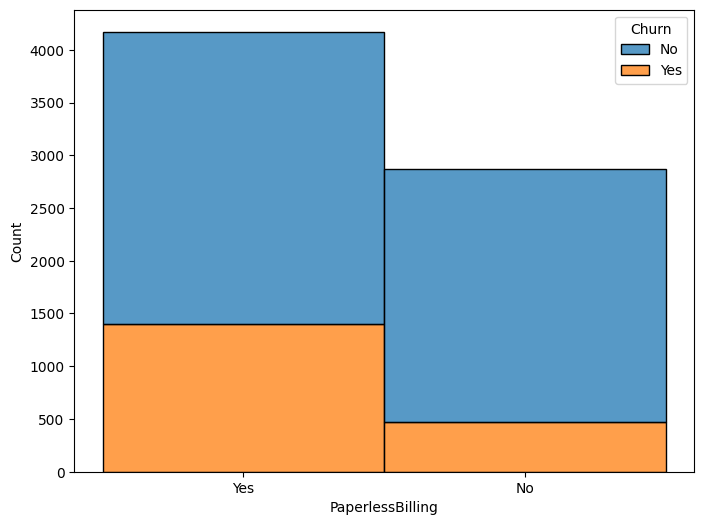

In [ ]:

# Crear la figura con el tamaño deseado
plt.figure(figsize=(8, 6))
bin_width = 10
bin_range = range(170, 250, bin_width)
# Axes-level
sns.histplot(data=df, x="PaperlessBilling", hue="Churn", multiple="stack", bins=bin_range)
stat="percent" #permite verlo en frecuencia relativa
plt.show()

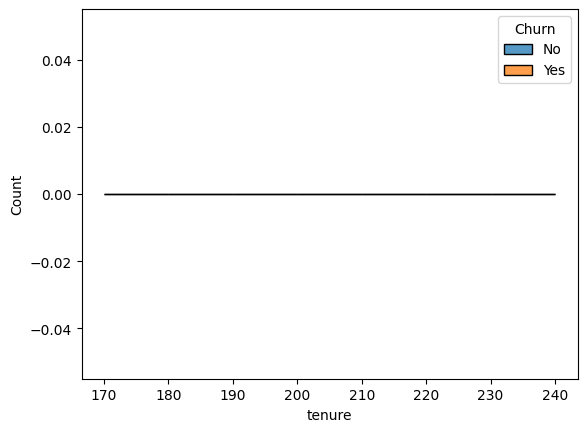

In [ ]:
sns.histplot(data=df, x="PaymentMethod", hue="Churn", multiple="stack", bins=bin_range)
stat="percent" #permite verlo en frecuencia relativa
plt.show()

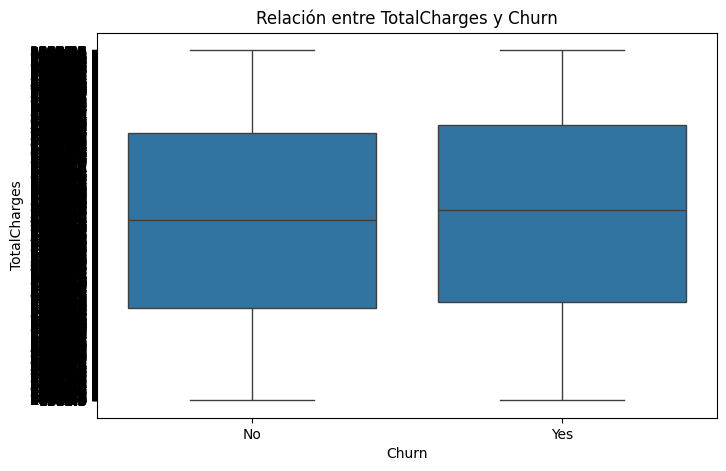

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Relación entre TotalCharges y Churn")
plt.show()

Analizar si a mayor monto mayor churn

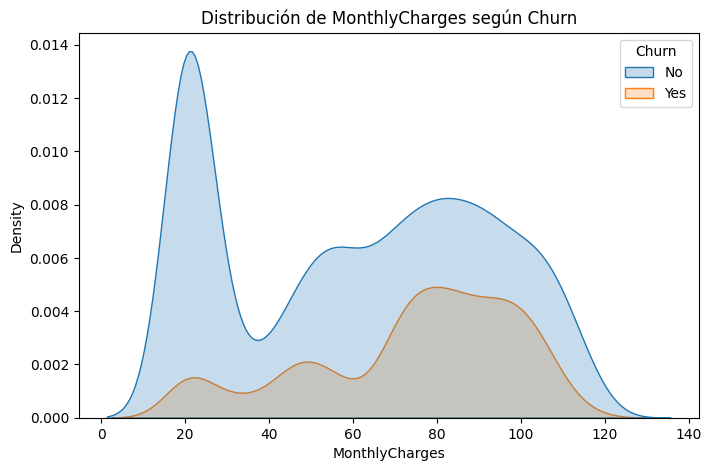

In [ ]:
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
df = df.dropna(subset=["MonthlyCharges"])

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Distribución de MonthlyCharges según Churn")
plt.show()
